In [1]:
%matplotlib inline 

In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize

In [3]:
df = pd.read_csv('data/covtype.data')

In [4]:
#from kaggle
df1 = pd.read_csv('data/train.csv')
df1.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
col = df1.columns

In [6]:
df = pd.read_csv('data/covtype.data',names=col)

In [7]:
#from uci ml repo
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,5,NaN
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,5,NaN
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,2,NaN
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,2,NaN
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,5,NaN


In [8]:
df.describe

<bound method DataFrame.describe of           Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596         51       3    258                                 0   
1       2590         56       2    212                                -6   
2       2804        139       9    268                                65   
3       2785        155      18    242                               118   
4       2595         45       2    153                                -1   
5       2579        132       6    300                               -15   
6       2606         45       7    270                                 5   
7       2605         49       4    234                                 7   
8       2617         45       9    240                                56   
9       2612         59      10    247                                11   
10      2612        201       4    180                                51   
11      2886        151      11    371              

In [9]:
df.shape

(581012, 56)

In [10]:
df.columns

Index([u'Id', u'Elevation', u'Aspect', u'Slope',
       u'Horizontal_Distance_To_Hydrology', u'Vertical_Distance_To_Hydrology',
       u'Horizontal_Distance_To_Roadways', u'Hillshade_9am', u'Hillshade_Noon',
       u'Hillshade_3pm', u'Horizontal_Distance_To_Fire_Points',
       u'Wilderness_Area1', u'Wilderness_Area2', u'Wilderness_Area3',
       u'Wilderness_Area4', u'Soil_Type1', u'Soil_Type2', u'Soil_Type3',
       u'Soil_Type4', u'Soil_Type5', u'Soil_Type6', u'Soil_Type7',
       u'Soil_Type8', u'Soil_Type9', u'Soil_Type10', u'Soil_Type11',
       u'Soil_Type12', u'Soil_Type13', u'Soil_Type14', u'Soil_Type15',
       u'Soil_Type16', u'Soil_Type17', u'Soil_Type18', u'Soil_Type19',
       u'Soil_Type20', u'Soil_Type21', u'Soil_Type22', u'Soil_Type23',
       u'Soil_Type24', u'Soil_Type25', u'Soil_Type26', u'Soil_Type27',
       u'Soil_Type28', u'Soil_Type29', u'Soil_Type30', u'Soil_Type31',
       u'Soil_Type32', u'Soil_Type33', u'Soil_Type34', u'Soil_Type35',
       u'Soil_Type36', 

In [11]:
cover = df['Cover_Type']

In [12]:
del df['Cover_Type']
del df['Id']

In [13]:
from IPython.display import display, HTML
display(HTML(df.head().to_html(index=False)))

Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [14]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [15]:
df.skew()

Elevation                               0.402628
Aspect                                  0.789273
Slope                                   1.140437
Horizontal_Distance_To_Hydrology        1.790250
Vertical_Distance_To_Hydrology          0.713679
Horizontal_Distance_To_Roadways        -1.181147
Hillshade_9am                          -1.063056
Hillshade_Noon                         -0.277053
Hillshade_3pm                           1.288644
Horizontal_Distance_To_Fire_Points      0.205618
Wilderness_Area1                        4.061595
Wilderness_Area2                        0.257822
Wilderness_Area3                        3.575561
Wilderness_Area4                       13.736670
Soil_Type1                              8.615358
Soil_Type2                             10.838630
Soil_Type3                              6.625176
Soil_Type4                             18.995243
Soil_Type5                              9.240061
Soil_Type6                             74.367173
Soil_Type7          

In [16]:
#removing constant columns
remove_ = []
for i in df.columns:
    if df[i].std() == 0:
        remove_.append(i)

df.drop(remove_,axis=1,inplace=True)
print(remove_)

[]


In [17]:
from sklearn.preprocessing import Imputer,StandardScaler
Imp = Imputer()

In [18]:
col = df.columns
df = Imp.fit_transform(df)
df = pd.DataFrame(df, columns=col)

In [19]:
Sca = StandardScaler()

In [20]:
df = Sca.fit_transform(df)
df = pd.DataFrame(df, columns=col)

In [21]:
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366
1,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366
2,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.036857
3,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.036857
4,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366
5,-0.211385,-1.082191,0.143834,-1.053584,-1.464256,0.666942,0.692069,-0.066056,3.058999,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.036857
6,-0.988770,-0.948649,0.002690,-0.710502,-1.101262,0.368099,0.085048,-0.118310,3.228914,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366
7,-0.953028,-1.349277,-0.166682,-0.676194,-1.139742,0.368099,0.337973,0.038452,3.207769,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366
8,-0.988770,-0.681563,-0.138454,0.164356,-1.080098,0.405454,-0.117292,-0.248945,3.219852,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366
9,-0.863673,-0.548020,-0.105520,-0.607578,-1.099338,0.592231,-0.218463,-0.484089,3.209279,1.10808,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008AE41D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000197A9668>]], dtype=object)

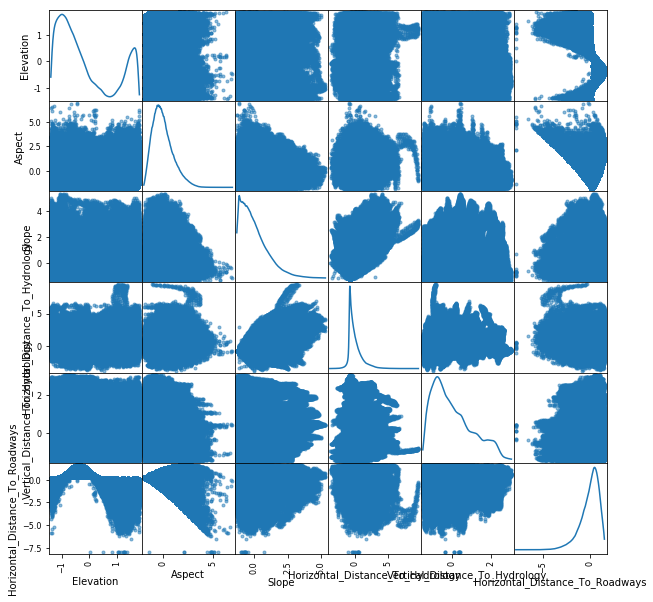

In [22]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df.ix[:,0:6],   # Make a scatter matrix of 6 columns
               figsize=(10, 10),   # Set plot size
               diagonal='kde')   

In [23]:
import matplotlib.pyplot as plt

In [24]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Elevation,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Aspect,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Slope,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Horizontal_Distance_To_Hydrology,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Vertical_Distance_To_Hydrology,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Horizontal_Distance_To_Roadways,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,0.201299,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_9am,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,0.028728,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_Noon,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,-0.115155,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Hillshade_3pm,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,0.380568,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936
Horizontal_Distance_To_Fire_Points,-0.140123,-0.234576,-0.097124,-0.180710,0.453913,0.201299,0.028728,-0.115155,0.380568,1.000000,...,-0.284490,-0.261970,-0.047587,-0.011714,-0.012917,0.015014,0.011073,0.012745,0.011974,-0.203913
